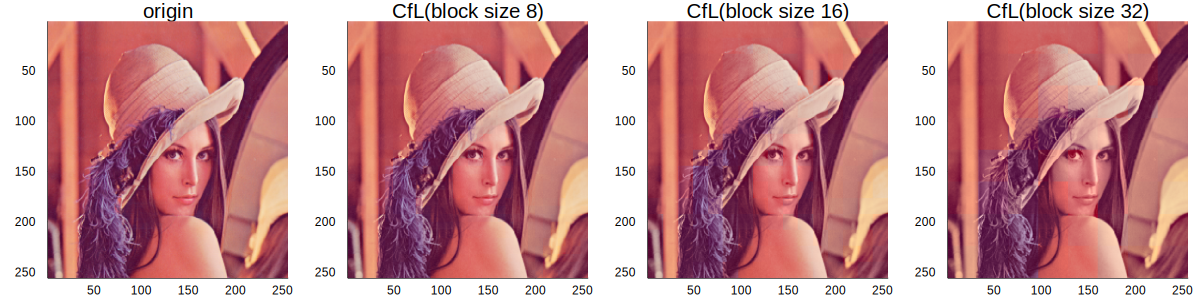

In [2]:
using Images, ImageView, TestImages
using Plots

lena = testimage("lena_color_256")
lena = YCbCr.(lena)
lena_arr = channelview(lena)

function cfl(img_arr, bs=8)
    nc, h, w = size(img_arr)
    img_arr_est = zeros((nc, h, w))
    
    for i in 1:Int(h/bs)
        si = (i-1)*bs + 1
        ei = i*bs
        for j in 1:Int(w/bs)
            sj = (j-1)*bs + 1
            ej = j*bs
            img_arr_tmp = img_arr[:, si:ei, sj:ej]

            # Cb
            x = vec(img_arr_tmp[1, :, :])
            y = vec(img_arr_tmp[2, :, :])
            cb_a = (bs*bs*sum(x.*y) - sum(x)*sum(y)) / (sum(bs*bs*(x.^2)) - sum(x)^2)
            cb_b = (sum(y) - cb_a * sum(x)) / (bs*bs)

            # Cr
            x = vec(img_arr_tmp[1, :, :])
            y = vec(img_arr_tmp[3, :, :])
            cr_a = (bs*bs*sum(x.*y) - sum(x)*sum(y)) / (sum(bs*bs*(x.^2)) - sum(x)^2)
            cr_b = (sum(y) - cr_a * sum(x)) / (bs*bs)

            x = img_arr_tmp[1, :, :]
            cb_est = cb_a .* x .+ cb_b
            cr_est = cr_a .* x .+ cr_b
            img_arr_est_tmp = zeros((3, bs, bs))
            img_arr_est_tmp[1,:,:] .= x
            img_arr_est_tmp[2,:,:] .= cb_est
            img_arr_est_tmp[3,:,:] .= cr_est

            img_arr_est[:, si:ei, sj:ej] .= img_arr_est_tmp
        end
    end
    img_arr_est
end

p_org = plot(colorview(YCbCr, lena_arr), title="origin")
p8 = plot(colorview(YCbCr, cfl(lena_arr, 8)), title="CfL(block size 8)")
p16 = plot(colorview(YCbCr, cfl(lena_arr, 16)), title="CfL(block size 16)")
p32 = plot(colorview(YCbCr, cfl(lena_arr, 32)), title="CfL(block size 32)")
plot(p_org, p8, p16, p32, layout = (1, 4), size = (1200, 300))